In [1]:
from utils import *
from model import VAE
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
model_path = "baseline_models/model_xs/model.pt"
params_path = "baseline_models/model_xs/params.json"

In [3]:
params = Params(params_path)
vae = VAE(params.patch_len, params.alphabet_size, params.n_latent, params.arch)
vae.load_state_dict(torch.load(model_path))
vae.eval()

VAE(
  (encoder): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=16, out_features=500, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=500, out_features=500, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=500, out_features=500, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.3, inplace=False)
    (10): Linear(in_features=500, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Unflatten(dim=1, unflattened_size=(1, 32))
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=32, out_features=500, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=500, out_features=500, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=500, out_features=500, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)
    (

#### See how decoded patches look like when varying symbol value at a specific position

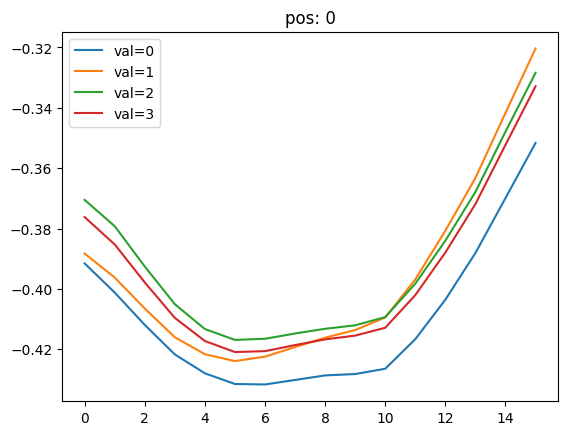

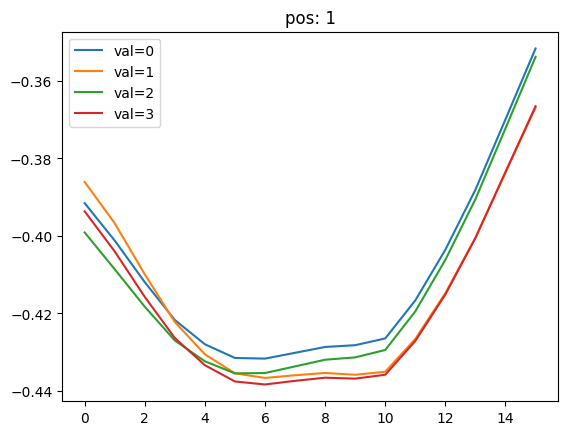

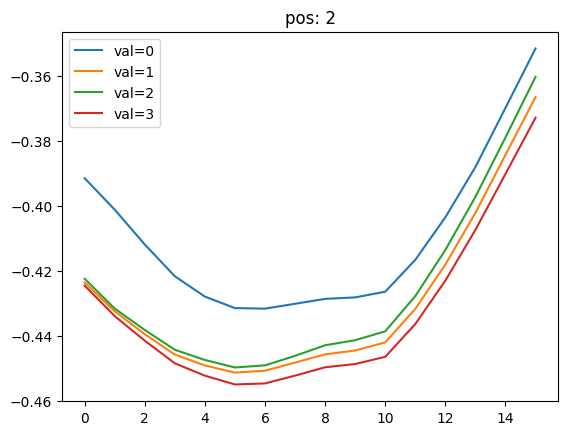

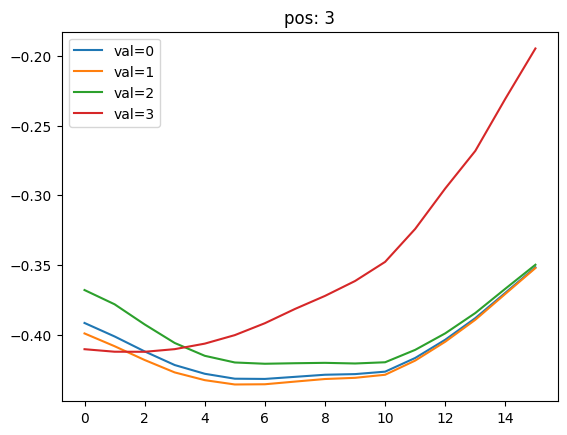

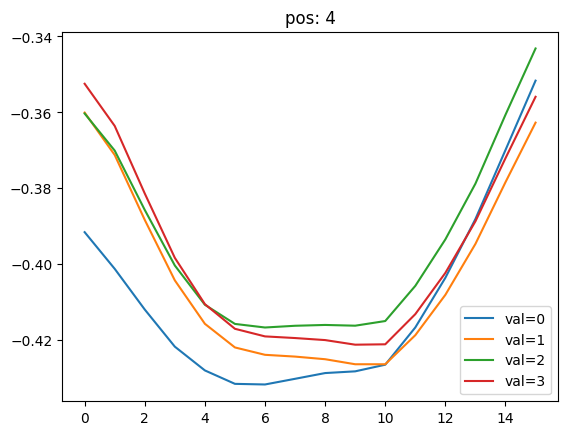

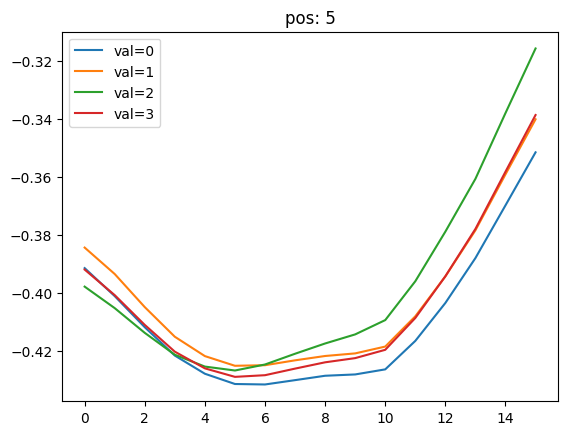

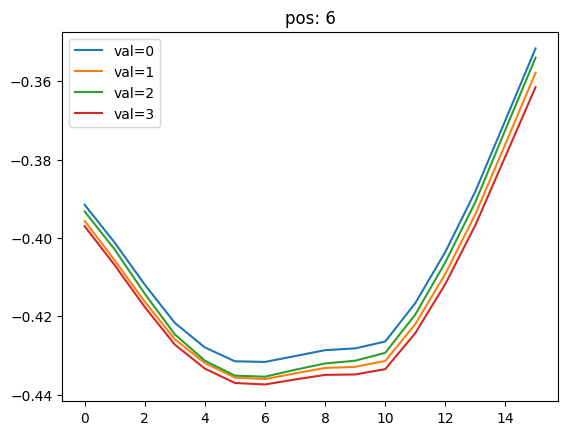

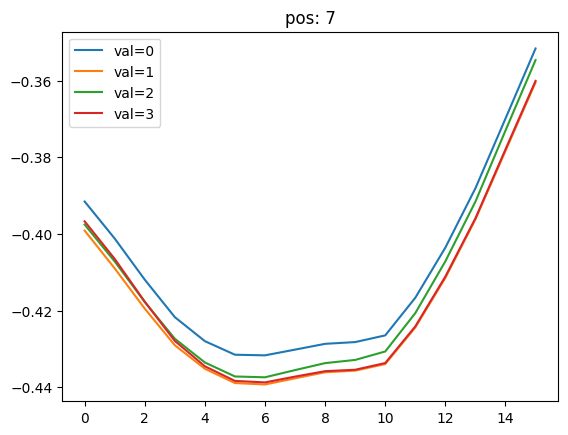

In [6]:
for i in range(params.n_latent):    # iterate over positions in encoding
    plt.figure()
    for j in range(params.alphabet_size):   # iterate over possible values for position
        enc = torch.zeros(params.n_latent, dtype=torch.int64)
        enc[i] = j
        z = torch.unsqueeze(F.one_hot(enc, num_classes=params.alphabet_size), 0)    # z.shape: (1, n_latent, alphabet_size)
        output = vae.decoder(z.float())
        plt.plot(output.detach().numpy().squeeze(), label=f'val={j}')
    
    plt.title(f'pos: {i}')
    plt.legend()
    plt.show()

tensor([2, 1, 0, 0, 2, 2, 1, 2])
tensor([0, 2, 2, 1, 1, 2, 0, 2])
tensor([1, 1, 2, 1, 1, 1, 0, 0])
tensor([2, 1, 1, 2, 2, 2, 1, 0])
tensor([1, 1, 2, 1, 2, 0, 0, 2])
tensor([2, 1, 0, 2, 2, 2, 2, 1])
tensor([0, 1, 1, 2, 1, 1, 0, 1])
tensor([0, 0, 0, 0, 2, 2, 1, 1])
tensor([0, 0, 1, 0, 0, 1, 1, 1])
tensor([2, 0, 1, 1, 2, 0, 0, 2])
tensor([1, 0, 0, 2, 0, 1, 1, 1])
tensor([1, 2, 1, 0, 1, 2, 2, 1])
tensor([2, 1, 1, 1, 0, 1, 2, 0])
tensor([1, 1, 2, 2, 1, 2, 2, 2])
tensor([2, 1, 2, 2, 1, 1, 0, 2])
tensor([1, 2, 1, 1, 2, 2, 2, 1])
tensor([0, 1, 2, 2, 2, 2, 2, 1])
tensor([2, 2, 0, 0, 1, 0, 2, 1])
tensor([0, 1, 2, 2, 1, 0, 0, 1])
tensor([2, 0, 0, 2, 1, 1, 2, 1])


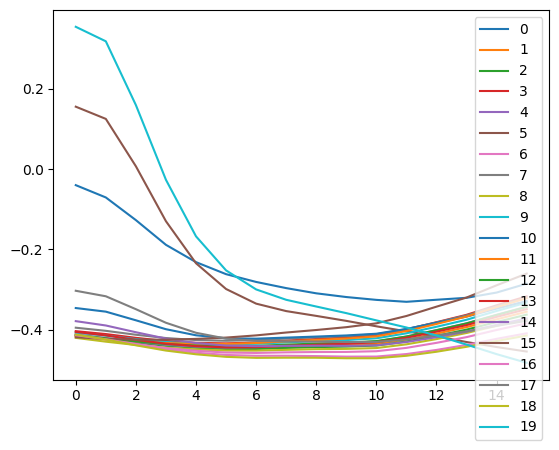

In [43]:
# generate random

for i in range(20):
    enc = torch.randint(0, params.alphabet_size-1, (params.n_latent,))
    print(enc)
    z = torch.unsqueeze(F.one_hot(enc, num_classes=params.alphabet_size), 0)    # z.shape: (1, n_latent, alphabet_size)
    output = vae.decoder(z.float())
    plt.plot(output.detach().numpy().squeeze(), label=i)

plt.legend()